# Import packages

In [27]:
import numpy as np
import pandas as pd
!pip install matplotlib==3.1.3
import matplotlib.pyplot as plt
from collections import Counter
from pandas.plotting import scatter_matrix
## import data
from sklearn.datasets import load_iris
from sklearn import datasets

## import DBSCAN model
from sklearn.cluster import DBSCAN
from sklearn import metrics


plt.style.use('ggplot')
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 33.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
traffic 2.8.0 requires matplotlib<4.0.0,>=3.4.2, but you have matplotlib 3.1.3 which is incompatible.
cartes 0.7.3 requires matplotlib<4.0,>=3.5, but you have matplotlib 3.1.3 which is incompatible.


<IPython.core.display.Javascript object>

# Import Iris Dataset

In [18]:
iris = datasets.load_iris()

<IPython.core.display.Javascript object>

In [19]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


<IPython.core.display.Javascript object>

In [20]:
X = iris.data    
y = iris.target
target_names = iris.target_names

<IPython.core.display.Javascript object>

In [21]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<IPython.core.display.Javascript object>

In [22]:
df = pd.DataFrame(X, columns=iris.feature_names)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<IPython.core.display.Javascript object>

# Visual exploratory data analysis

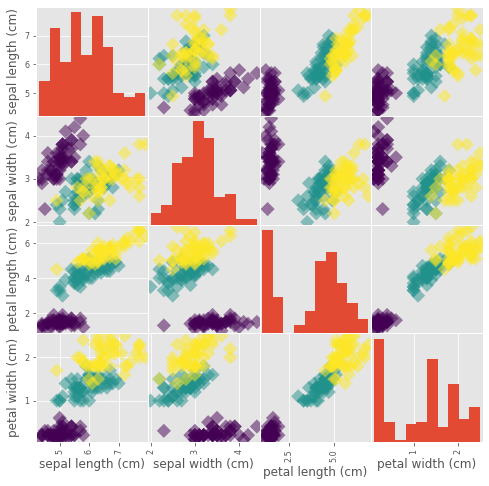

<IPython.core.display.Javascript object>

In [28]:
pd.plotting.scatter_matrix(df, c = y, figsize = [8, 8], s=100, marker='D')
plt.show()

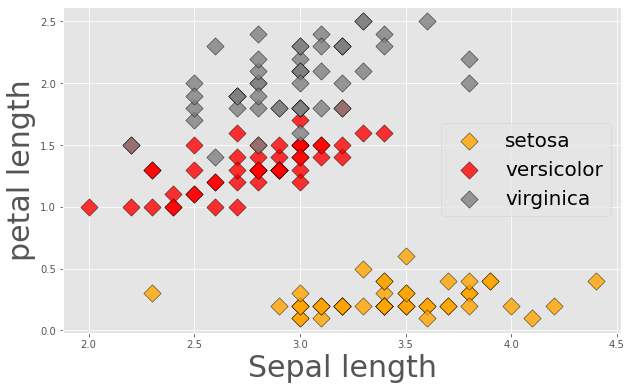

<IPython.core.display.Javascript object>

In [29]:
plt.figure(2, figsize=(10, 6))
colors = ['orange', 'red', 'gray']


for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X[y == i, 1], X[y == i, 3], color=color, alpha=.8, 
                label=target_name, s=150, cmap=plt.cm.Set1, edgecolor='k',marker='D')
plt.legend(loc='best', shadow=False, scatterpoints=1,fontsize=20)
plt.xlabel('Sepal length', fontsize=30) 
plt.ylabel('petal length', fontsize=30) 

plt.show()

# Train the model

In [30]:
model = DBSCAN(eps=0.8, min_samples=6).fit(X)
labels=model.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

<IPython.core.display.Javascript object>

## Number of clusters

In [31]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_ 

2

<IPython.core.display.Javascript object>

## Number of noise points

In [32]:
print("Number of Noise Points: ",sum(model.labels_==-1)," (",len(model.labels_),")",sep='')

Number of Noise Points: 2 (150)


<IPython.core.display.Javascript object>

In [33]:
count= Counter(model.labels_)
count

Counter({0: 50, 1: 98, -1: 2})

<IPython.core.display.Javascript object>

# Plot the clusters in feature space

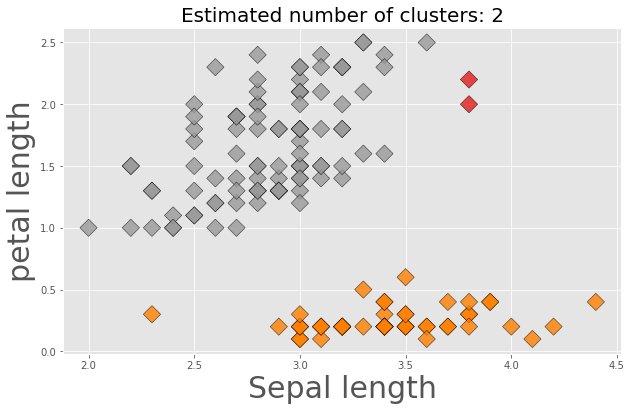

<IPython.core.display.Javascript object>

In [34]:
plt.figure(2, figsize=(10, 6))
plt.scatter(X[:, 1], X[:, 3], c=model.labels_, s=150,  cmap=plt.cm.Set1,alpha=.8, edgecolor='k',marker='D')
#plt.scatter(X[:, 1], X[:, 3], c=y, s=150, cmap=plt.cm.Set1, edgecolor='k', marker='D')   #target 
plt.xlabel('Sepal length', fontsize=30) 
plt.ylabel('petal length', fontsize=30) 
plt.title('Estimated number of clusters: %d' % n_clusters_, fontsize=20)
plt.show() 

# Finding number of clusters by varying eps

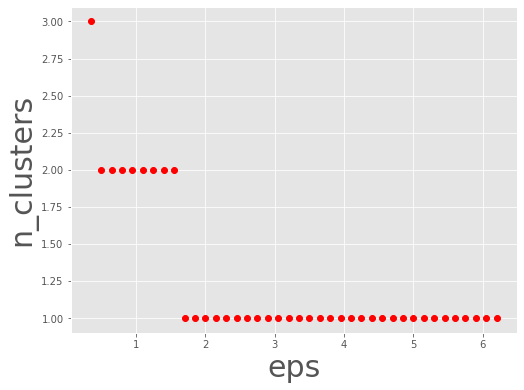

<IPython.core.display.Javascript object>

In [35]:
eps=0.2
for i in range(40):
    eps +=0.15
    model = DBSCAN(eps, min_samples=6).fit(X)
    labels = model.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    plt.figure(2, figsize=(8, 6))
    plt.plot(eps,  n_clusters_,'-o', c='red')
    plt.ylabel('n_clusters', fontsize=30)
    plt.xlabel('eps',fontsize=30)
plt.show()  



# Completeness & homogeneity scores

In [36]:
model = DBSCAN(eps=0.8, min_samples=6).fit(X)
labels=model.labels_
labels_true = iris.target

print("Completeness: %0.2f" % metrics.completeness_score(labels_true, labels))
print("Homogeneity: %0.2f" % metrics.homogeneity_score(labels_true, labels))

Completeness: 0.92
Homogeneity: 0.59


<IPython.core.display.Javascript object>

In [37]:
print("Completeness: %0.1f" %  metrics.completeness_score([0, 0, 1, 1], [1, 1, 0, 0]))

Completeness: 1.0


<IPython.core.display.Javascript object>

In [38]:
print("Completeness: %0.1f" %  metrics.completeness_score([0, 0, 1, 1], [0, 0, 0, 0]))

Completeness: 1.0


<IPython.core.display.Javascript object>

In [39]:
print("Homogeneity: %0.1f" %  metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 0, 0]))

Homogeneity: 0.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>